# Анализ параметров установок на режимах частичной мощности

## Импорт библиотек

In [194]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Latex
from IPython.display import Math
pd.set_option('max_colwidth',80)

## Постоянные

In [195]:
data_root = '/home/artem/gowork/src/github.com/Sovianum/cooling-course-project/notebooks/data/'

## Функции ввода-вывода

### Функции работы с текстом

In [196]:
def get_2_shafts_parameters_note(extremal_value_df):
    pi = extremal_value_df.pi.values[0]
    eta = extremal_value_df.eta.values[0]
    power = extremal_value_df.N_e.values[0] / 1e6
    mass_rate = extremal_value_df.G.values[0]
    return Math(r'''
    \begin{align}
        \pi = %.1f && \eta = %.3f && L_e = %.3f \ МДж/кг && G = %.1f \ кг/с
    \end{align}
    ''' % (pi, eta, power, mass_rate))

### Функции работы с графиками

In [197]:
def plot_characteristic(power, y_arr, ylabel):
    plt.title('$Приведенная \ характеристика \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(power / power.max(), y_arr)
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()

def plot_common_characteristics(data, y_min=0.8, y_max=1.02):
    plt.title('$Приведенные \ характеристики \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(data.power / data.power.max(), data.mass_rate / data.mass_rate.max())
#     plt.plot(data.pi, data.eta / data.eta.max())
#     plt.ylim([y_min, y_max])
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()
    plt.legend(['$\overline{G}$', '$\overline{\eta}$'], loc='lower right')

## Двухвальная установка без регенератора

### Загрузка данных

In [203]:
data_2n = pd.read_json(data_root + '2n.json').sort_values('t')

In [204]:
data_2n

,eta,g_norm_tc,g_norm_tf,mass_rate,pi_c,pi_f,pi_tc,power,rpm_ft,rpm_tc,t
14,0.278063,0.999999,0.986420,41.575544,14.993397,2.559114,5.286335,7.784501,2359.526472,9607.966443,1310
13,0.294842,1.000000,0.990990,43.511512,15.753731,2.675578,5.312635,8.733967,2451.800355,9674.096993,1320
12,0.307660,1.000000,0.993916,45.058508,16.378166,2.773097,5.328985,9.547285,2525.658123,9724.754486,1330
11,0.318086,1.000000,0.995910,46.375081,16.922808,2.859559,5.339709,10.279682,2588.656856,9766.302751,1340
10,0.326824,1.000000,0.997299,47.532420,17.412716,2.938444,5.346793,10.955286,2644.168781,9801.591498,1350
9,0.334287,1.000000,0.998269,48.571689,17.862318,3.011740,5.351366,11.587991,2694.122322,9832.246818,1360
8,0.340743,1.000000,0.998938,49.519361,18.280863,3.080709,5.354146,12.186674,2739.741971,9859.299934,1370
7,0.346360,1.000000,0.999388,50.392349,18.674220,3.146132,5.355620,12.756785,2781.815625,9883.413125,1380
6,0.351277,1.000000,0.999678,51.204282,19.047127,3.208642,5.356146,13.302882,2820.957261,9905.100873,1390
5,0.355591,1.000000,0.999853,51.964493,19.402800,3.268653,5.355990,13.827910,2857.591275,9924.719081,1400


### Построим общие характеристики установки

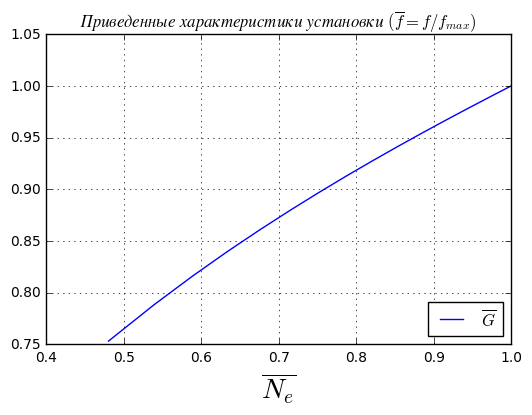

In [205]:
plot_common_characteristics(data_2n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

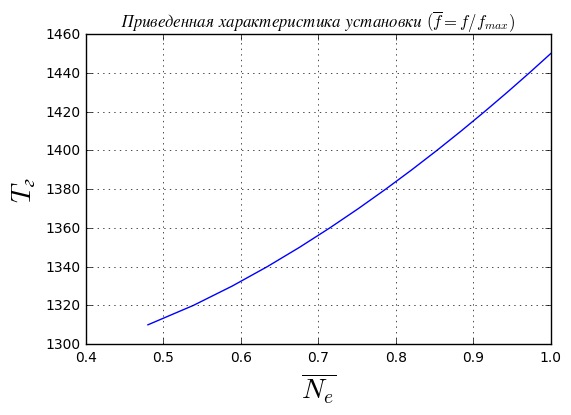

In [206]:
plot_characteristic(data_2n.power, data_2n.t, "$T_г$")
plt.show()

## Двухвальная установка с регенератором

### Загрузка данных

In [174]:
data_2nr = pd.read_json(data_root + '2nr.json').sort_values('t')

In [175]:
data_2nr

,eta,g_norm_tc,g_norm_tf,mass_rate,pi_c,pi_f,pi_tc,power,rpm_ft,rpm_tc,sigma,t
29,0.466709,0.999987,0.973909,38.583949,5.248344,2.012803,2.305639,5.438326,2093.644854,8875.331599,0.914912,1160
28,0.464453,0.999991,0.976498,39.156345,5.350643,2.046199,2.312217,5.747312,2132.567795,8928.199434,0.910583,1170
27,0.462454,0.999993,0.978910,39.719656,5.452330,2.079594,2.318322,6.062511,2170.861451,8979.621866,0.906255,1180
26,0.460682,0.999995,0.981152,40.274535,5.553473,2.113016,2.323979,6.383871,2208.560478,9029.709401,0.901932,1190
25,0.459100,0.999997,0.983231,40.820725,5.654017,2.146448,2.329201,6.710996,2245.657869,9078.486101,0.897623,1200
24,0.457682,0.999998,0.985151,41.358430,5.753973,2.179897,2.334007,7.043661,2282.166969,9126.013864,0.893333,1210
23,0.456392,0.999999,0.986919,41.887542,5.853305,2.213354,2.338409,7.381511,2318.086785,9172.324156,0.889071,1220
22,0.455220,0.999999,0.988542,42.408463,5.952053,2.246832,2.342429,7.724389,2353.437289,9217.489162,0.884835,1230
21,0.454148,0.999999,0.990026,42.921311,6.050214,2.280332,2.346081,8.072014,2388.224911,9261.553517,0.880631,1240
20,0.453151,1.000000,0.991377,43.426214,6.147790,2.313852,2.349383,8.424112,2422.456458,9304.559847,0.876463,1250


In [176]:
plt.plot(data_2nr.pi_c, data_2nr.t)
plt.grid()

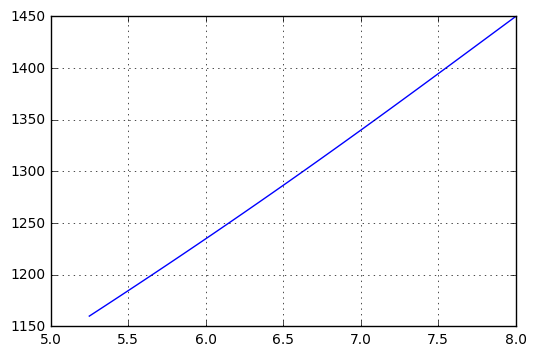

In [177]:
plt.show()

### Построим общие характеристики установки

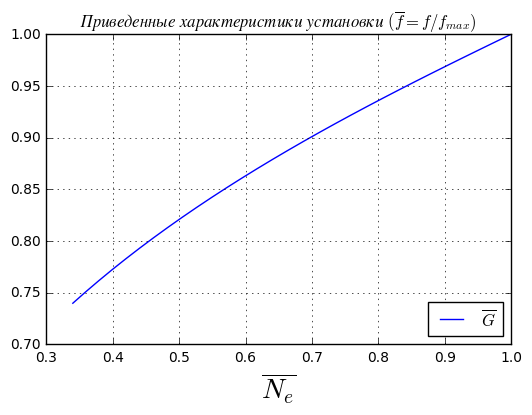

In [178]:
plot_common_characteristics(data_2nr)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

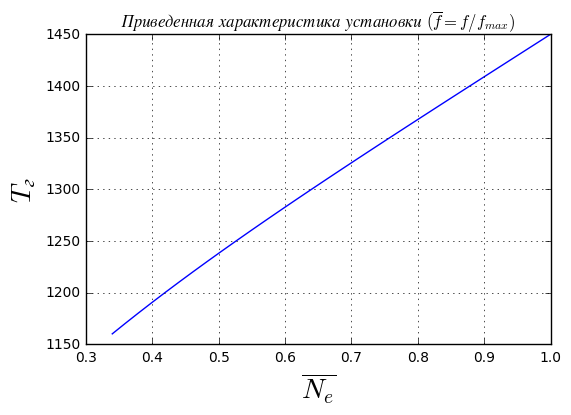

In [179]:
plot_characteristic(data_2nr.power, data_2nr.t, "$T_г$")
plt.show()

### Построим зависимость коэффициента восстановления от относительной мощности установки

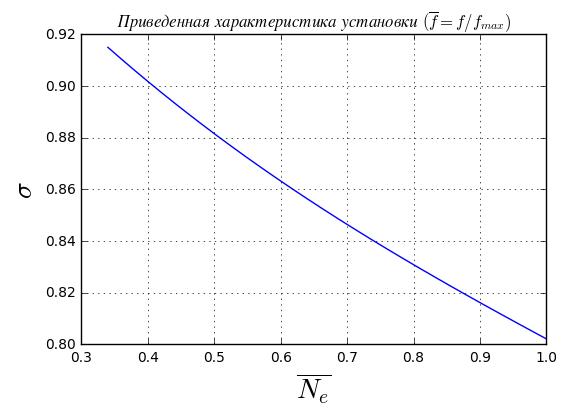

In [180]:
plot_characteristic(data_2nr.power, data_2nr.sigma, "$\sigma$")
plt.show()

### Построим зависимость коэффициента восстановления от температуры в камере сгорания

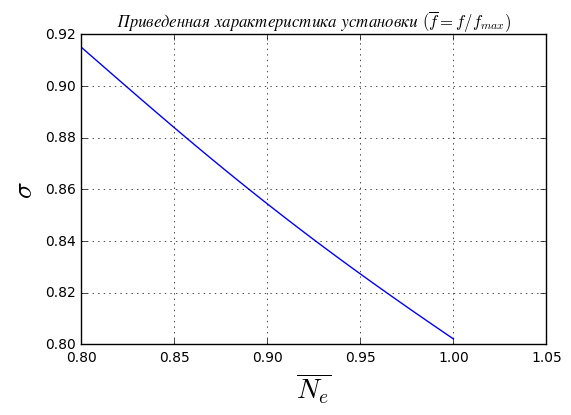

In [181]:
plot_characteristic(data_2nr.t, data_2nr.sigma, "$\sigma$")
plt.show()

## Трехвальная установка без пром. охлаждения, пром. подогрева и регенератора

### Загрузка данных

In [182]:
data_3n = pd.read_json(data_root + '3n.json').sort_values('t')

In [183]:
data_3n

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
16,0.249159,0.995843,1.0,1.0,47.149564,2.415792,2.351564,3.421377,9.781824,2543.652922,5756.941703,5551.573338,1290
15,0.253296,0.996658,1.0,1.0,47.703255,2.452236,2.360766,3.462103,10.179208,2577.816223,5773.055733,5583.459615,1300
14,0.257278,0.997359,1.0,1.0,48.248141,2.488684,2.370031,3.502064,10.579235,2611.328766,5789.024595,5614.685518,1310
13,0.261100,0.997954,1.0,1.0,48.784502,2.525133,2.379345,3.541297,10.981544,2644.199903,5804.854089,5645.290451,1320
12,0.264765,0.998453,1.0,1.0,49.312393,2.561568,2.388702,3.579812,11.385662,2676.428991,5820.549238,5675.297345,1330
11,0.268274,0.998862,1.0,1.0,49.832298,2.597995,2.398094,3.617656,11.791312,2708.030847,5836.123071,5704.752026,1340
10,0.271628,0.999193,1.0,1.0,50.344472,2.634408,2.407511,3.654860,12.198120,2739.011962,5851.581426,5733.685759,1350
9,0.274828,0.999452,1.0,1.0,50.849084,2.670794,2.416944,3.691448,12.605683,2769.375958,5866.927630,5762.122940,1360
8,0.277876,0.999648,1.0,1.0,51.346725,2.707164,2.426388,3.727472,13.013801,2799.141042,5882.178515,5790.110221,1370
7,0.280773,0.999791,1.0,1.0,51.837726,2.743510,2.435830,3.762974,13.422149,2828.315135,5897.337254,5817.679010,1380


### Построим общие характеристики установки

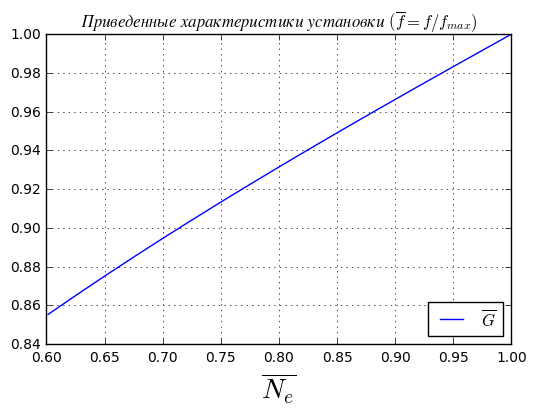

In [184]:
plot_common_characteristics(data_3n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

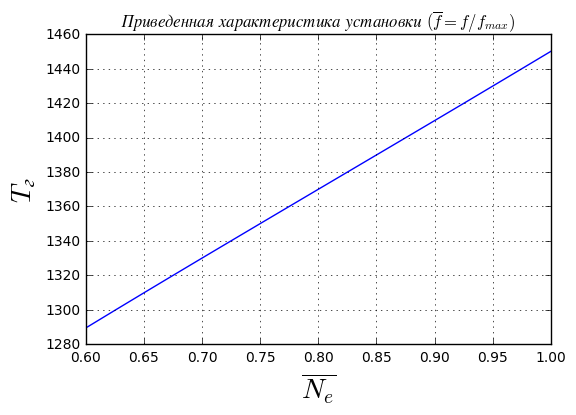

In [185]:
plot_characteristic(data_3n.power, data_3n.t, "$T_г$")
plt.show()

## Трехвальная установка с пром. охлаждением

### Загрузка данных

In [186]:
data_3nс = pd.read_json(data_root + '3nc.json').sort_values('t')

In [187]:
data_3nс

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
16,0.254561,0.991652,1.0,1.0,35.544025,2.828584,2.263284,3.337318,8.771193,2471.932035,5826.419630,5417.776743,1290
15,0.260280,0.993346,1.0,1.0,36.204742,2.887784,2.278366,3.390732,9.241689,2515.565281,5837.638079,5461.956367,1300
14,0.265687,0.994780,1.0,1.0,36.845007,2.946392,2.293414,3.442042,9.711522,2557.697051,5848.799383,5504.658966,1310
13,0.270790,0.995981,1.0,1.0,37.465838,3.004434,2.308431,3.491360,10.180103,2598.398093,5859.909511,5546.005261,1320
12,0.275596,0.996974,1.0,1.0,38.067996,3.061913,2.323417,3.538775,10.646764,2637.723138,5870.970602,5586.086859,1330
11,0.280118,0.997781,1.0,1.0,38.652481,3.118851,2.338369,3.584399,11.110996,2675.732817,5881.982397,5625.002750,1340
10,0.284362,0.998424,1.0,1.0,39.220376,3.175274,2.353285,3.628349,11.572421,2712.491028,5892.946856,5662.849404,1350
9,0.288340,0.998926,1.0,1.0,39.772644,3.231198,2.368167,3.670729,12.030632,2748.051864,5903.868010,5699.708727,1360
8,0.292061,0.999305,1.0,1.0,40.310489,3.286658,2.383012,3.711663,12.485423,2782.478257,5914.748237,5735.674643,1370
7,0.295532,0.999581,1.0,1.0,40.835040,3.341686,2.397819,3.751272,12.936600,2815.827669,5925.585973,5770.833234,1380


### Построим общие характеристики установки

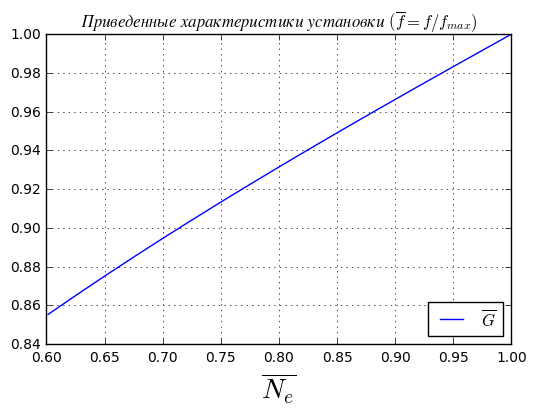

In [188]:
plot_common_characteristics(data_3n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

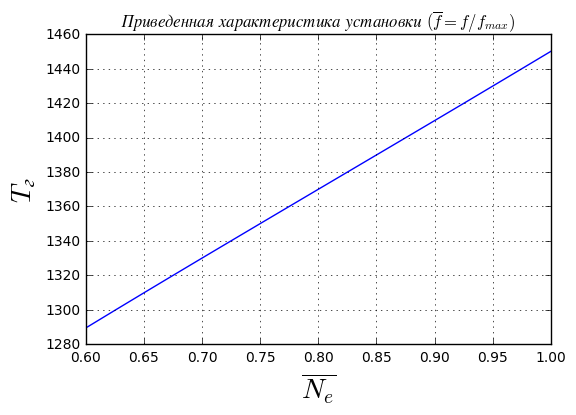

In [189]:
plot_characteristic(data_3n.power, data_3n.t, "$T_г$")
plt.show()

## Трехвальная установка с пром. подогревом

### Загрузка данных

In [190]:
data_3nb = pd.read_json(data_root + '3nb.json').sort_values('t')

In [191]:
data_3nb

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
16,0.255222,0.997643,0.999879,1.0,40.630464,2.565896,2.073784,3.803959,11.200104,2678.656440,5471.434056,5636.919723,1290
15,0.259555,0.998170,0.999902,1.0,41.210366,2.601508,2.099926,3.825654,11.549534,2706.412619,5507.405390,5656.419107,1300
14,0.263768,0.998612,0.999921,1.0,41.787092,2.637146,2.126347,3.846410,11.898097,2733.556145,5543.141512,5677.022597,1310
13,0.267842,0.998975,0.999938,1.0,42.358813,2.672685,2.153029,3.866115,12.244402,2760.013075,5578.636538,5698.654442,1320
12,0.271761,0.999268,0.999952,1.0,42.923691,2.707999,2.179956,3.884659,12.586765,2785.692845,5613.891678,5721.215692,1330
11,0.275518,0.999496,0.999964,1.0,43.479729,2.742944,2.207102,3.901928,12.923738,2810.528043,5648.901948,5744.578915,1340
10,0.279102,0.999669,0.999974,1.0,44.025072,2.777386,2.234448,3.917828,13.253880,2834.455661,5683.669367,5768.601395,1350
9,0.282506,0.999795,0.999981,1.0,44.557791,2.811182,2.261965,3.932269,13.575873,2857.424568,5718.186981,5793.116691,1360
8,0.285721,0.999883,0.999987,1.0,45.076253,2.844208,2.289627,3.945186,13.888257,2879.375962,5752.456383,5817.954932,1370
7,0.288745,0.999939,0.999992,1.0,45.579008,2.876351,2.317410,3.956534,14.190056,2900.286195,5786.477317,5842.942194,1380


### Построим общие характеристики установки

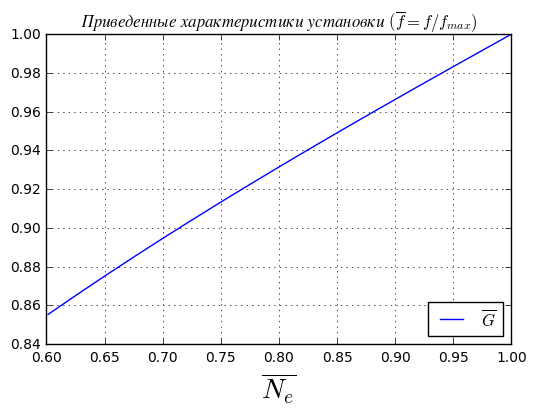

In [192]:
plot_common_characteristics(data_3n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

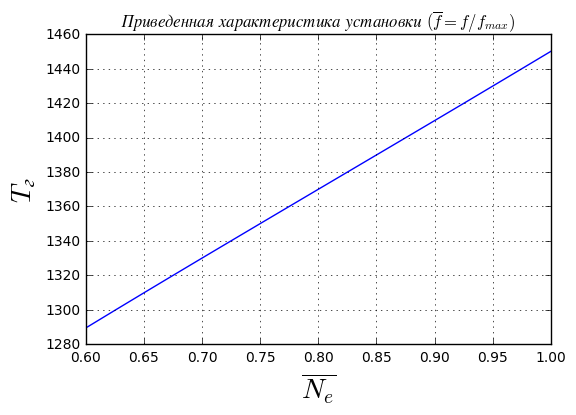

In [193]:
plot_characteristic(data_3n.power, data_3n.t, "$T_г$")
plt.show()